Nupur Kulkarni
OK42132
nupur1@umbc.edu

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('mnist_data.txt',sep=" ", header=None)

MNIST dataset contains images (28 * 28 = 784 pixels) of 10,000 handwritten digits

In [3]:
data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
labels = pd.read_csv('mnist_labels.txt',sep=" ", header=None)

MNIST labels has labels for corresponding images

In [5]:
labels.head(5)

,0
0,7
1,2
2,1
3,0
4,4


In [6]:
labels.dtypes

0    int64
dtype: object

In [7]:
type(labels[0])

pandas.core.series.Series

Check the indices where we have label '8'

In [8]:
labels.loc[labels[0]==8].head(5)

,0
61,8
84,8
110,8
128,8
134,8


Now we want our model to predict if the image of handwritten digit belongs to '8' or not.
So, we will convert 'labels' dataframe to contain only positive and negative samples i.e '0' or '1'.
'1' indicates that image belongs to digit '8' and '0' indicates that image belongs to digits other than '8'.

In [9]:
labels[0] = labels[0].apply(lambda digit: 1 if(digit==8) else 0)

In [10]:
labels.dtypes

0    int64
dtype: object

In [11]:
type(labels)

pandas.core.frame.DataFrame

Confirm if we have '1' for data points where label is '8'. 
We already have indices for data points where label is '8'. So, after label dataframe modfication, we should have same indices for '1'

In [12]:
labels.loc[labels[0]==1].head(5)

,0
61,1
84,1
110,1
128,1
134,1


Divide the dataset into training and testing samples

In [13]:
train_features = data
train_labels = labels
test_features = data
test_labels = labels

In [14]:
print (train_features.shape)

(10000, 784)


In [15]:
print (test_features.shape)

(10000, 784)


Let's define a sigmoid function which takes scores as input

In [16]:
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

In [17]:
train_features.shape

(10000, 784)

If we want to consider w0 i.t weight for constant term then we can add a column of all 1s before our features dataframe
intercept = np.ones((features.shape[0], 1))
features = np.hstack((intercept, features))

In [18]:
def logistic_regression(features, target, no_iterations, learning_rate, lamda):
    
    print ("Dimentions of features",features.shape)  
#     Create a numpy array of weights and initialize it to zero
#     Weight vecor will have weight corresponding to every predictor variable i.e pixel in this case
    w = np.zeros(features.shape[1])
    print ("Dimentions of weight vector",w.shape)
#     We define stopping criteria as fixed no of iterations
    for iteration in range(no_iterations):
#         Get predicted label using sigmoid function
        scores = np.dot(features, w)
        pred_label = sigmoid(scores)
        error = target - pred_label

#         gradient is xij * error
        gradient = np.dot(features.T, error)
#         Gradient ascent with L2 Regularization
        gradient = gradient - (2 * lamda * w)
#         Update weights with gradient        
        w += learning_rate * gradient        
      
    return w

print (features.T)

In [19]:
w = logistic_regression(train_features, train_labels[0].T,
                     no_iterations = 50, learning_rate = 0.0001, lamda = 0.0001)


Dimentions of features (10000, 784)
Dimentions of weight vector (784,)


In [20]:
print (w)

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.89999814e-03 -1.17999884e-02 -7.89999226e-03
 -2.01499803e-02 -3.61499658e-02 -7.78499268e-02 -1.72949852e-01
 -7.13899597e-01 -3.11199656e-01 -3.80248958e-01 -3.23648986e-01
 -5.17499513e-02 -2.11449878e-01 -4.65999782e-01 -2.50999754e-02
 -9.59999059e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.18499

Lets calculate accuracy for our model.
First we get predicted label using test data

In [21]:
def getPrediction():
    scores = np.dot(test_features, w)
    pred_label = sigmoid(scores)
    #Round off predicted label to 0 or 1
    pred = np.round(pred_label)
    pred = pred.astype(np.int64)
    return pred

compare predicted labels with true labels

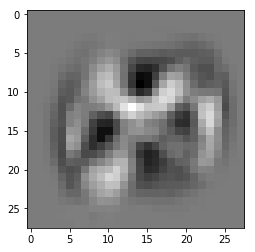

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt 
im = w.reshape((28,28),order='F')
plt.imshow(im,cmap="gray")

As we plot the weight vector as a image, we see an approximate shape of 8. For this classification problem, we see darker region, where weight values are high meaning it is the region where we will have less pixel values for digit 8. The lighter region represents the pixel values for which weight is less i.e this region represents digit 8. This image highly depends on number of iterations, learning rate and lamda value. So, for higher iterations we get a blur image of 8.

In [26]:
lamda = [0, 0.0001, 0.00075, 0.00085, 0.001]
accuracy = []
for l in lamda:
    print (l)
    w = logistic_regression(train_features, train_labels[0].T,
                     no_iterations = 500, learning_rate = 0.0001, lamda = l)
    pred = getPrediction()
    #calculate accuracy by comparing predictions and true values
    true = train_labels[0].T
    count = 0
    for i in range(0,len(pred)):
        if pred[i]==true[i]:
            count+=1
    acc = count/len(pred)
    accuracy.append (acc)
accuracy

0
Dimentions of features (10000, 784)
Dimentions of weight vector (784,)
0.0001
Dimentions of features (10000, 784)
Dimentions of weight vector (784,)
0.00075
Dimentions of features (10000, 784)
Dimentions of weight vector (784,)
0.00085
Dimentions of features (10000, 784)
Dimentions of weight vector (784,)
0.001
Dimentions of features (10000, 784)
Dimentions of weight vector (784,)


[0.9004, 0.9095, 0.9126, 0.8975, 0.8601]

In [27]:
print ("Training set accuracy = %f for lamdda = 0" % (accuracy[0]))

Training set accuracy = 0.900400 for lamdda = 0


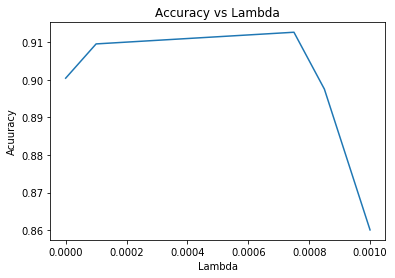

In [28]:
plt.plot(lamda, accuracy)
plt.xlabel("Lambda")
plt.ylabel("Acuuracy")
plt.title("Accuracy vs Lambda")
plt.show()

As we see above, as the lambda value increases, we try to minimize weight values. So, we get better accuracy initially as we increase lamda because we do not see any overfitting. After a certain point, even if we increase lambda, accuracy starts dropping. So, we should choose the lambda where we get highest accuracy. 